In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("Predict2.csv")
df.shape

(100, 2)

In [16]:
df.head()

,X,Y
0,9.1,0.99523
1,8.0,0.99007
2,9.1,0.99769
3,8.4,0.99386
4,6.9,0.99508


In [32]:
x = df['X'].values
y = df['Y'].values

In [34]:
x_mean = np.mean(x)
x_std = np.std(x)
x = (x - x_mean) / x_std

In [84]:
theta0 = 0
theta1 = 0
learning_rate = 0.5
iterations = 50
m = len(y)
tolerance = 1e-6

In [86]:
def compute_cost(x, y, theta0, theta1):
    predictions = theta0 + theta1 * x
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [88]:
cost_history = []
for i in range(iterations):
    predictions = theta0 + theta1 * x
    error = predictions - y
    theta0 -= learning_rate * (1 / m) * np.sum(error)
    theta1 -= learning_rate * (1 / m) * np.sum(error * x)
    cost = compute_cost(x, y, theta0, theta1)
    cost_history.append(cost)
    if i > 0 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
        print(f"Converged after {i} iterations")
        break

Converged after 10 iterations


In [90]:
print(f"Theta0: {theta0}, Theta1: {theta1}")
print(f"Final Cost: {cost}")

Theta0: 0.9961334690917968, Theta1: 0.0013395416259238116
Final Cost: 1.313194845507832e-06


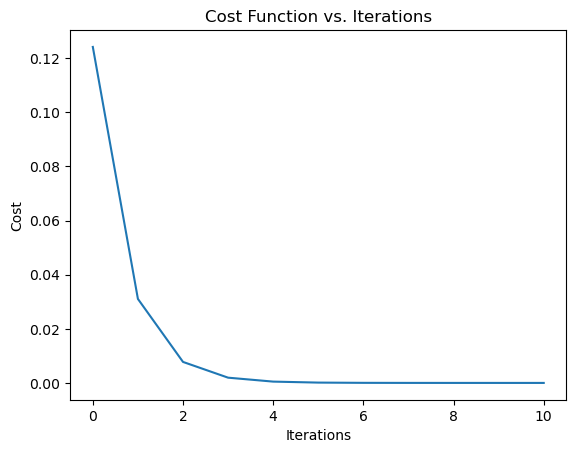

In [92]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations')
plt.show()

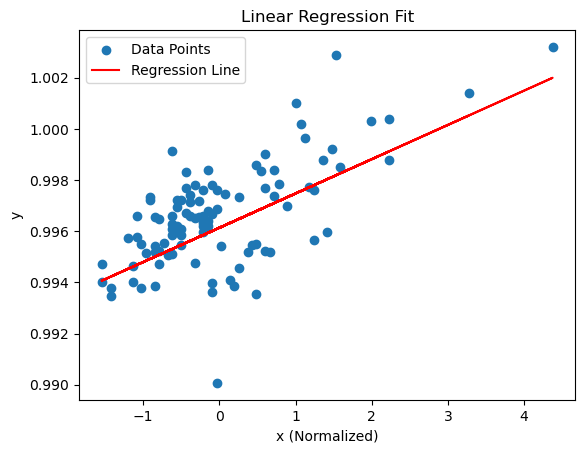

In [94]:
plt.scatter(x, y, label='Data Points')
plt.plot(x, theta0 + theta1 * x, color='red', label='Regression Line')
plt.xlabel('x (Normalized)')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [96]:
def gradient_descent(x, y, learning_rate, iterations=50):
    m = len(y)
    theta0, theta1 = 0, 0
    cost_history = []
    for i in range(iterations):
        predictions = theta0 + theta1 * x
        error = predictions - y
        theta0 -= learning_rate * (1 / m) * np.sum(error)
        theta1 -= learning_rate * (1 / m) * np.sum(error * x)
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        cost_history.append(cost)
    return theta0, theta1, cost_history

In [104]:
learning_rate = [0.005.0.5.5]
iterations = 50

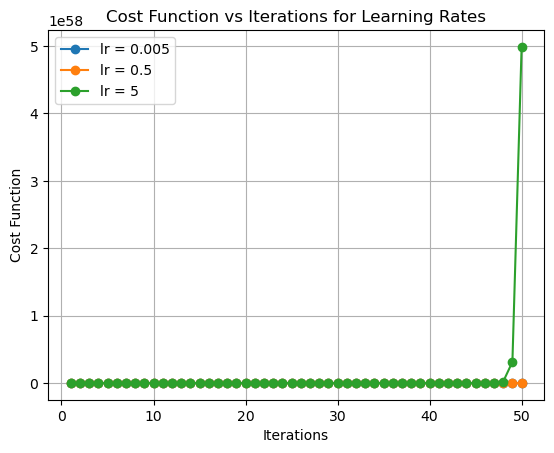

In [165]:
cost_histories = {}
for lr in learning_rates:
    _, _, cost_history = gradient_descent(x, y, learning_rate=lr,iterations=iterations)
    plt.plot(range(1,51), cost_history, marker='o',label=f'lr = {lr}')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations for Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Predict2.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Assuming columns are 'x' and 'y'
x = data['x'].values
y = data['y'].values

# Normalize x
x_mean = np.mean(x)
x_std = np.std(x)
x = (x - x_mean) / x_std

# Function to compute cost
def compute_cost(x, y, theta0, theta1):
    m = len(y)
    predictions = theta0 + theta1 * x
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Batch Gradient Descent
def batch_gradient_descent(x, y, learning_rate, iterations=50):
    theta0, theta1 = 0, 0
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = theta0 + theta1 * x
        error = predictions - y
        
        # Update parameters
        theta0 -= learning_rate * (1 / m) * np.sum(error)
        theta1 -= learning_rate * (1 / m) * np.sum(error * x)
        
        # Store cost
        cost_history.append(compute_cost(x, y, theta0, theta1))

    return cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(x, y, learning_rate, iterations=50):
    theta0, theta1 = 0, 0
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        for i in range(m):
            prediction = theta0 + theta1 * x[i]
            error = prediction - y[i]
            
            # Update parameters
            theta0 -= learning_rate * error
            theta1 -= learning_rate * error * x[i]
        
        # Store cost after processing all data points
        cost_history.append(compute_cost(x, y, theta0, theta1))

    return cost_history

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(x, y, learning_rate, batch_size=10, iterations=50):
    theta0, theta1 = 0, 0
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Shuffle data
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        
        for i in range(0, m, batch_size):
            x_batch = x_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            predictions = theta0 + theta1 * x_batch
            error = predictions - y_batch
            
            # Update parameters
            theta0 -= learning_rate * (1 / len(y_batch)) * np.sum(error)
            theta1 -= learning_rate * (1 / len(y_batch)) * np.sum(error * x_batch)
        
        # Store cost after processing all batches
        cost_history.append(compute_cost(x, y, theta0, theta1))

    return cost_history

# Learning rate
learning_rate = 0.5

# Run gradient descent methods
bgd_cost_history = batch_gradient_descent(x, y, learning_rate)
sgd_cost_history = stochastic_gradient_descent(x, y, learning_rate)
mbgd_cost_history = mini_batch_gradient_descent(x, y, learning_rate, batch_size=10)

# Plot cost function vs. iterations
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(bgd_cost_history) + 1), bgd_cost_history, label='Batch Gradient Descent')
plt.plot(range(1, len(sgd_cost_history) + 1), sgd_cost_history, label='Stochastic Gradient Descent')
plt.plot(range(1, len(mbgd_cost_history) + 1), mbgd_cost_history, label='Mini-Batch Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iterations for Gradient Descent Variants')
plt.legend()
plt.grid()
plt.show()

KeyError: 'x'